# <div align="center"><b> Matteo code without any changes </b></div>

<IPython.core.display.Javascript object>


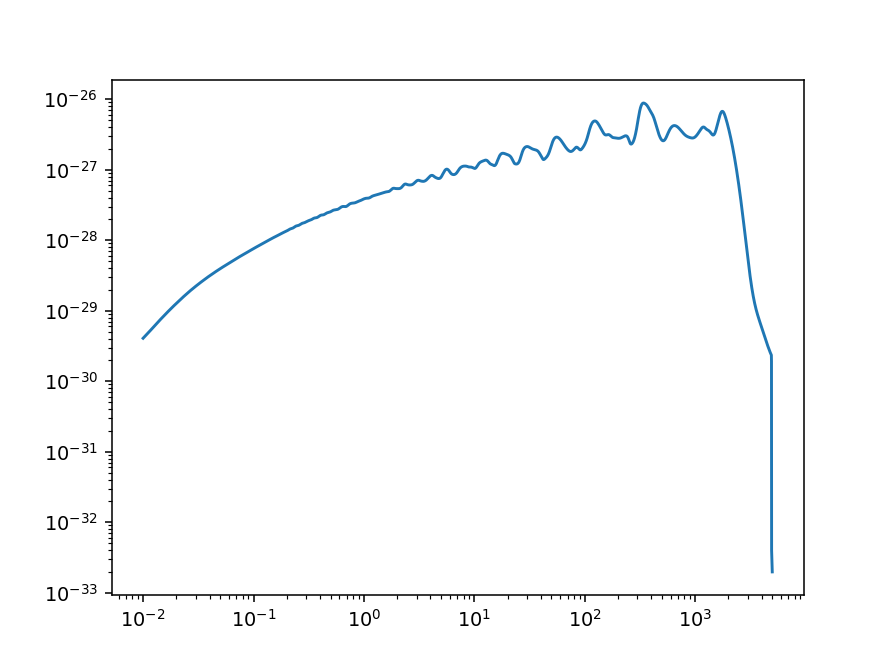

In [2]:
%matplotlib notebook

from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline, RegularGridInterpolator

# Funtion to read table_Taylor_coeff table and compute CRR spectrum for given choice of params
# Input:   array of values of the paramters {omega_b, Yp,T0, omega_cdm, N_eff} ('param_vals'),
# Output: nu, reference and total DI_CRR
def run_Taylor_exp(param_vals):
  # Read Taylor_exp table
  param_vals_ref = np.array([0.02242, 0.2437, 2.7255, 0.11933, 2.99])

  # Set fiducial and read Taylor_exp table
  if(param_vals[3]<(param_vals_ref[3]+0.2177712)/2.):
    array=loadtxt('table_Taylor_coeff_1.dat')
  elif(param_vals[3]>(0.3266568+0.2177712)/2.):
    param_vals_ref[3]=0.3266568
    array=loadtxt('table_Taylor_coeff_3.dat')
  else:
    param_vals_ref[3]=0.2177712
    array=loadtxt('table_Taylor_coeff_2.dat')

  array=array.T
  nu=array[0]
  DI_CRR_ref=array[1]
  DDI_CRR=[array[i+2] for i in range(0,len(param_vals_ref))]
  DDDI_CRR=np.zeros((len(nu), len(param_vals_ref), len(param_vals_ref)))
  for i in range(0,len(param_vals_ref)):
    for j in range(0,len(param_vals_ref)):
      DDDI_CRR[:,i,j]=array[2+len(param_vals_ref)+len(param_vals_ref)*i+j]

  # Define step per param
  Dp = np.array(param_vals)-np.array(param_vals_ref)

  # Compute spectrum
  DI_CRR_Taylor_O1 = np.zeros((len(nu)))
  DI_CRR_Taylor_O2 = np.zeros((len(nu)))
  for k in range(0, len(nu)):
    for i in range(0, len(param_vals_ref)):
      DI_CRR_Taylor_O1[k] += DDI_CRR[i][k]*Dp[i]
      for j in range(0, len(param_vals_ref)):
        DI_CRR_Taylor_O2[k] += DDDI_CRR[k,i,j]*Dp[i]*Dp[j]/2.
  DI_CRR = DI_CRR_ref+DI_CRR_Taylor_O1+DI_CRR_Taylor_O2

  return nu, DI_CRR_ref, DI_CRR

# Example
param_vals = np.array([0.02242, 0.2437, 2.7255, 0.11933, 2.99])
nu, DI_CRR_ref, DI_CRR = run_Taylor_exp(param_vals)

plt.loglog(nu,DI_CRR)
plt.show()


# <div align="center"><b> In 1-6 GHz frequency range </b></div>

<IPython.core.display.Javascript object>


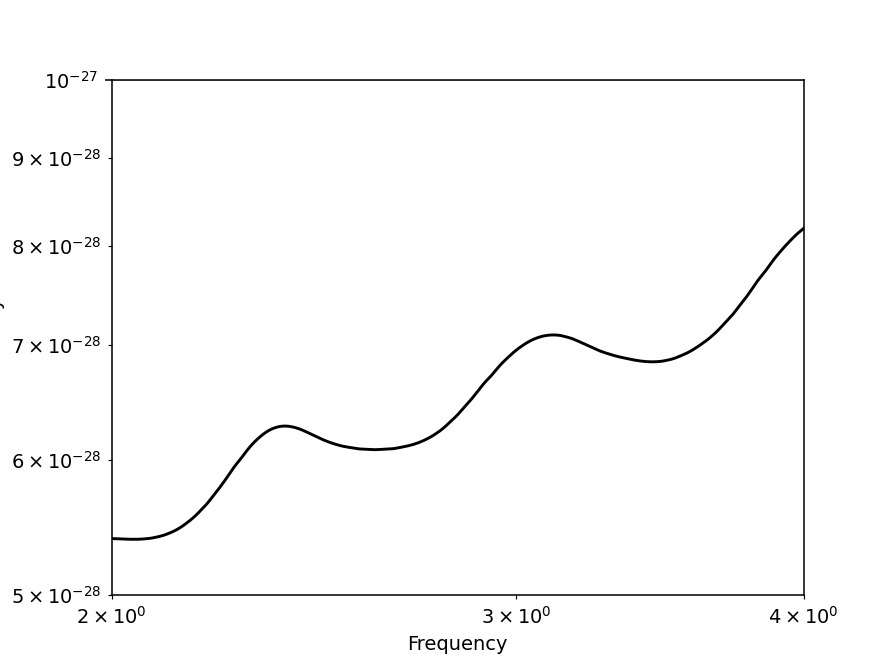

In [5]:
%matplotlib notebook

from numpy import *
import numpy as np
import matplotlib.pyplot as plt

# Funtion to read table_Taylor_coeff table and compute CRR spectrum for given choice of params
# Input:   array of values of the paramters {omega_b, Yp,T0, omega_cdm, N_eff} ('param_vals'),
# Output: nu, reference and total DI_CRR
def run_Taylor_exp(param_vals):
  # Read Taylor_exp table
  param_vals_ref = np.array([0.02242, 0.2437, 2.7255, 0.11933, 2.99])

  # Set fiducial and read Taylor_exp table
  if(param_vals[3]<(param_vals_ref[3]+0.2177712)/2.):
    array=loadtxt('table_Taylor_coeff_1.dat')
  elif(param_vals[3]>(0.3266568+0.2177712)/2.):
    param_vals_ref[3]=0.3266568
    array=loadtxt('table_Taylor_coeff_3.dat')
  else:
    param_vals_ref[3]=0.2177712
    array=loadtxt('table_Taylor_coeff_2.dat')

  array=array.T
  nu=array[0]
  DI_CRR_ref=array[1]
  DDI_CRR=[array[i+2] for i in range(0,len(param_vals_ref))]
  DDDI_CRR=np.zeros((len(nu), len(param_vals_ref), len(param_vals_ref)))
  for i in range(0,len(param_vals_ref)):
    for j in range(0,len(param_vals_ref)):
      DDDI_CRR[:,i,j]=array[2+len(param_vals_ref)+len(param_vals_ref)*i+j]

  # Define step per param
  Dp = np.array(param_vals)-np.array(param_vals_ref)

  # Compute spectrum
  DI_CRR_Taylor_O1 = np.zeros((len(nu)))
  DI_CRR_Taylor_O2 = np.zeros((len(nu)))
  for k in range(0, len(nu)):
    for i in range(0, len(param_vals_ref)):
      DI_CRR_Taylor_O1[k] += DDI_CRR[i][k]*Dp[i]
      for j in range(0, len(param_vals_ref)):
        DI_CRR_Taylor_O2[k] += DDDI_CRR[k,i,j]*Dp[i]*Dp[j]/2.
  DI_CRR = DI_CRR_ref+DI_CRR_Taylor_O1+DI_CRR_Taylor_O2

  return nu, DI_CRR_ref, DI_CRR

# Example
param_vals = np.array([0.02242, 0.2437, 2.7255, 0.11933, 2.99])
nu, DI_CRR_ref, DI_CRR = run_Taylor_exp(param_vals)

plt.loglog(nu,DI_CRR, color = 'black')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.xlim([2,4])
plt.ylim([0.5e-27, 1e-27])
plt.grid()
plt.show()

## Please ignore the below cell 

<IPython.core.display.Javascript object>


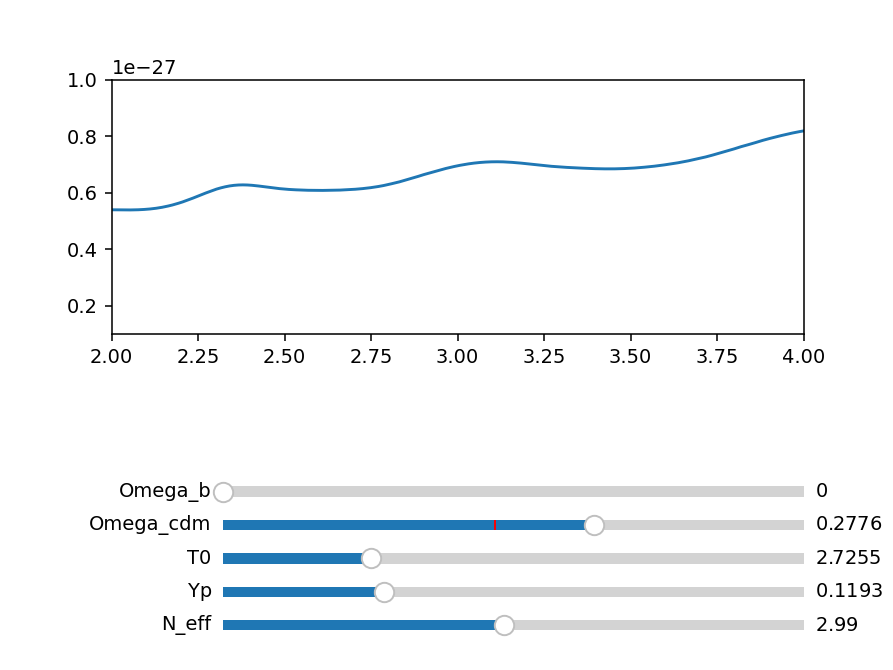

In [54]:
def run_Taylor_exp(param_vals):
  # Read Taylor_exp table
  param_vals_ref = np.array([0.02242, 0.2437, 2.7255, 0.11933, 2.99])

  # Set fiducial and read Taylor_exp table
  if(param_vals[3]<(param_vals_ref[3]+0.2177712)/2.):
    array=np.loadtxt('table_Taylor_coeff_1.dat')
  elif(param_vals[3]>(0.3266568+0.2177712)/2.):
    param_vals_ref[3]=0.3266568
    array=loadtxt('table_Taylor_coeff_3.dat')
  else:
    param_vals_ref[3]=0.2177712
    array=loadtxt('table_Taylor_coeff_2.dat')

  array=array.T
  nu=array[0]
  DI_CRR_ref=array[1]
  DDI_CRR=[array[i+2] for i in range(0,len(param_vals_ref))]
  DDDI_CRR=np.zeros((len(nu), len(param_vals_ref), len(param_vals_ref)))
  for i in range(0,len(param_vals_ref)):
    for j in range(0,len(param_vals_ref)):
      DDDI_CRR[:,i,j]=array[2+len(param_vals_ref)+len(param_vals_ref)*i+j]

  # Define step per param
  Dp = np.array(param_vals)-np.array(param_vals_ref)

  # Compute spectrum
  DI_CRR_Taylor_O1 = np.zeros((len(nu)))
  DI_CRR_Taylor_O2 = np.zeros((len(nu)))
  for k in range(0, len(nu)):
    for i in range(0, len(param_vals_ref)):
      DI_CRR_Taylor_O1[k] += DDI_CRR[i][k]*Dp[i]
      for j in range(0, len(param_vals_ref)):
        DI_CRR_Taylor_O2[k] += DDDI_CRR[k,i,j]*Dp[i]*Dp[j]/2.
  DI_CRR = DI_CRR_ref+DI_CRR_Taylor_O1+DI_CRR_Taylor_O2

  return nu, DI_CRR_ref, DI_CRR



##############################################################################################################


# Import libraries
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

# Create a subplot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.5)
omega_b = 0.02242
omega_cdm = 0.2437 
T0 = 2.7255
Yp = 0.11933 
N_eff = 2.99


# Create and plot a bar chart
# year = ['2002', '2004', '2006', '2008', '2010']
# production = [25, 15, 35, 30, 10]
# plt.bar(year, production, color=(r, g, b),
# 		edgecolor="black")

# param_vals = np.array([omega_b,omega_cdm,T0,Yp, N_eff])
param_vals = np.array([0.02242, 0.2437,2.7255 ,0.11933, 2.99])
nu, DI_CRR_ref, DI_CRR = run_Taylor_exp(param_vals)


l, = plt.plot(nu,DI_CRR)
plt.xlim([2,4])
plt.ylim([1e-28,1e-27])


# Create 3 axes for 3 sliders red,green and blue
ax_omega_b = plt.axes([0.25, 0.25, 0.65, 0.03])
ax_omega_cdm = plt.axes([0.25, 0.20, 0.65, 0.03])
ax_T0 = plt.axes([0.25, 0.15, 0.65, 0.03])
ax_Yp = plt.axes([0.25, 0.1, 0.65, 0.03])
ax_N_eff = plt.axes([0.25, 0.05, 0.65, 0.03])


# Create a slider from 0.0 to 1.0 in axes axred
# with 0.6 as initial value.
omega_b = Slider(ax_omega_b, 'Omega_b', 0.021, 225, 0.02242)                 # Ωb = 0.023 ± 0.001

# Create a slider from 0.0 to 1.0 in axes axgreen
# with 0.2 as initial value.
omega_cdm = Slider(ax_omega_cdm, 'Omega_cdm', 0.15, 0.35, 0.2437)            # Ωc = 0.2589 ± 0.0057

# Create a slider from 0.0 to 1.0 in axes axblue
# with 0.5(default) as initial value
T0 = Slider(ax_T0, 'T0', 2.7, 2.8, 2.7255)                                   # T0 ~ 2.73
Yp = Slider(ax_Yp, 'Yp', 0.05 , 0.3, 0.11933)                                # Yp ~ 0.247
N_eff = Slider(ax_N_eff, 'N_eff', 2.7, 3.3, 2.99)                            # N_eff ~ 3   


# Create function to be called when slider value is changed

def update(val):
    omega_b = omega_b.val
    omega_cdm = omega_cdm.val
    Yp = Yp.val
    T0 = T0.val
    N_eff = N_eff.val
    print('Values updated')
    
    param_vals = np.array([omega_b,omega_cdm,T0,Yp, N_eff])
    nu, DI_CRR_ref, DI_CRR = run_Taylor_exp(param_vals)
    
    l.set_ydata(np.sum(param_vals)*just_test)
    

# Call update function when slider value is changed
omega_b.on_changed(update)
omega_cdm.on_changed(update)
Yp.on_changed(update)
T0.on_changed(update)
N_eff.on_changed(update)


# Display graph
plt.show()


## Generating normalized sensitivity of each parameter to use for covariance matrix calculation

<IPython.core.display.Javascript object>


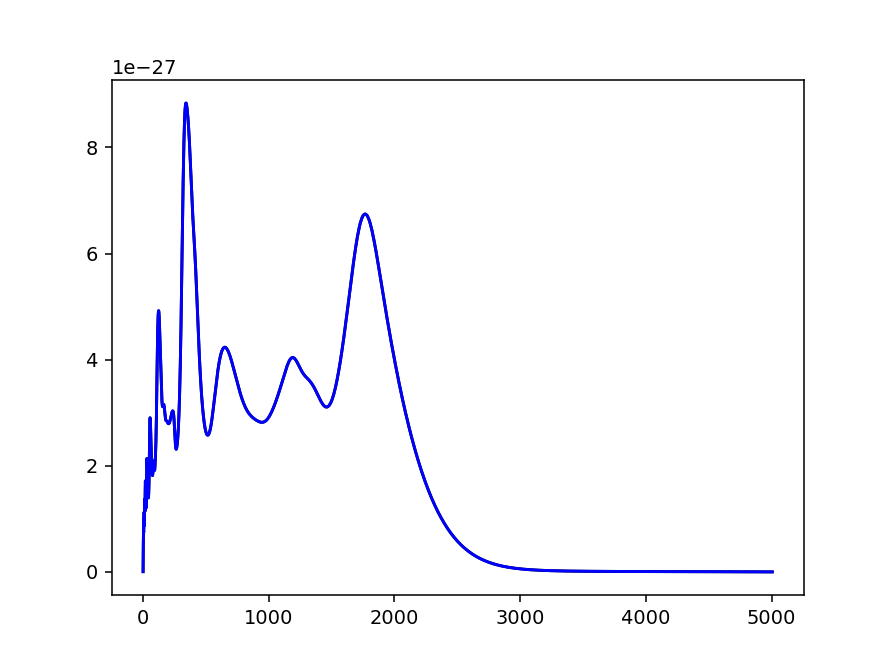

[-7.50054367e-31 -7.63078193e-31 -7.42646853e-31 -6.71122110e-31
 -5.58438246e-31 -4.47472288e-31 -3.34160521e-31 -1.73647342e-31
 -4.84251169e-33  1.44750101e-31  2.97576454e-31  4.60495922e-31
  6.16612238e-31  7.73793289e-31  9.20504512e-31  1.03181380e-30
  1.13925777e-30  1.27013804e-30  1.37851162e-30  1.45010803e-30
  1.47953476e-30  1.50820383e-30  1.55767460e-30  1.59611216e-30
  1.55125067e-30  1.50272298e-30  1.50894826e-30  1.59963936e-30
  1.69448310e-30  1.69729836e-30  1.64812221e-30  1.67212971e-30
  1.84948706e-30  1.99060352e-30  2.04196225e-30  2.14604795e-30
  2.26334892e-30  2.32398090e-30  2.36040122e-30  2.38713941e-30
  2.37352079e-30  2.31548966e-30  2.21745851e-30  2.08977995e-30
  1.93679412e-30  1.75711104e-30  1.56735892e-30  1.35987952e-30
  1.15167447e-30  9.81997039e-31  8.49381861e-31  7.51446605e-31
  6.78448004e-31  6.33737935e-31  6.08230719e-31  5.97886353e-31
  6.20697200e-31  6.61348451e-31  6.79779849e-31  6.90679498e-31
  7.17890222e-31  7.29762

In [10]:
%matplotlib notebook

# Funtion to read table_Taylor_coeff table and compute CRR spectrum for given choice of params
# Input:   array of values of the paramters {omega_b, Yp,T0, omega_cdm, N_eff} ('param_vals'),
# Output: nu, reference and total DI_CRR
def run_Taylor_exp(param_vals):
  # Read Taylor_exp table
  param_vals_ref = np.array([0.02242, 0.2437, 2.7255, 0.11933, 2.99])

  # Set fiducial and read Taylor_exp table
  if(param_vals[3]<(param_vals_ref[3]+0.2177712)/2.):
    array=loadtxt('table_Taylor_coeff_1.dat')
  elif(param_vals[3]>(0.3266568+0.2177712)/2.):
    param_vals_ref[3]=0.3266568
    array=loadtxt('table_Taylor_coeff_3.dat')
  else:
    param_vals_ref[3]=0.2177712
    array=loadtxt('table_Taylor_coeff_2.dat')

  array=array.T
  nu=array[0]
  DI_CRR_ref=array[1]
  DDI_CRR=[array[i+2] for i in range(0,len(param_vals_ref))]
  DDDI_CRR=np.zeros((len(nu), len(param_vals_ref), len(param_vals_ref)))
  for i in range(0,len(param_vals_ref)):
    for j in range(0,len(param_vals_ref)):
      DDDI_CRR[:,i,j]=array[2+len(param_vals_ref)+len(param_vals_ref)*i+j]

  # Define step per param
  Dp = np.array(param_vals)-np.array(param_vals_ref)

  # Compute spectrum
  DI_CRR_Taylor_O1 = np.zeros((len(nu)))
  DI_CRR_Taylor_O2 = np.zeros((len(nu)))
  for k in range(0, len(nu)):
    for i in range(0, len(param_vals_ref)):
      DI_CRR_Taylor_O1[k] += DDI_CRR[i][k]*Dp[i]
      for j in range(0, len(param_vals_ref)):
        DI_CRR_Taylor_O2[k] += DDDI_CRR[k,i,j]*Dp[i]*Dp[j]/2.
  DI_CRR = DI_CRR_ref+DI_CRR_Taylor_O1+DI_CRR_Taylor_O2

  return nu, DI_CRR_ref, DI_CRR




## With standard cosmology values

param_vals = np.array([0.02242, 0.2437, 2.7255, 0.11933, 2.99])
nu, DI_CRR_ref, DI_CRR = run_Taylor_exp(param_vals)

plt.plot(nu, DI_CRR, color = 'black')
#plt.show()

ius = InterpolatedUnivariateSpline(nu, DI_CRR)
freqs = np.linspace(2,4,201)
Rec_int = ius(freqs)

## Varying single parameter (+0.01) and generating the signal. 

param_vals1 = np.array([0.02242, 0.2437, 2.7255, 0.11933, 3.00])
nu1, DI_CRR_ref1, DI_CRR1 = run_Taylor_exp(param_vals1)

plt.plot(nu, DI_CRR, color = 'blue')
plt.show()

ius = InterpolatedUnivariateSpline(nu1, DI_CRR1)
freqs = np.linspace(2,4,201)
Rec_int1 = ius(freqs)

## Calculating the normalized sensitivity for each paramater and saving in a txt file for later use. 

Normalized_Sensitivity = (Rec_int1 - Rec_int)/ (0.001 * 2.99)
print(Normalized_Sensitivity)

np.savetxt('N_eff Normalized Sensitivity', Normalized_Sensitivity)
